**importing modules**

In [2]:
# data visualisation and manipulation
import pandas as pd #import the Pandas library to read the CSV and save it in a data frame
import matplotlib.pyplot as plt

#import nltk #preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize, sent_tokenize # tokenizing
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from nltk.corpus import stopwords  #stopwords
import emoji

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# (?) stop-words: this list includes 'not'
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olkos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olkos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olkos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [4]:
# loading dataset
reviews = pd.read_csv("reviews_taxi_data - data.csv", encoding='utf-8')
reviews.head(5)

,order_id,feedback_id,rider_id,driver_id,created_at,stars,custom_comment
0,0d47c51b-a1df-4901-97eb-58ee193d9655,b89cf504-f2fb-4ad4-a113-1112f6da5265,9d9e0f25-a383-444e-afe7-01ed085d216f,d6c92134-8f65-4da4-b6ab-a2a5c4bbaf9f,2023-03-01 01:49:32,1,very not polite
1,ae23c8d2-496a-47a8-8fb4-bd48f3e6f342,93748ca6-e77a-46e9-8460-f9c65b3781f6,576e7518-c1af-4697-9182-4251a488cbec,a635ef51-6da4-446a-9161-45d0a48ec2d2,2023-03-01 03:40:14,3,not a pleasant interaction overall. The driver...
2,def53af0-8c66-4759-ac16-7143b9e116d5,7edf5cf5-aa9f-4be6-8ca7-cd03c1aa66c0,e24c35a0-1cbf-43a1-9cae-171a89d1e7c1,57c5de49-2a44-46f8-800c-71a39490ea92,2023-03-01 06:46:58,1,Driver is a theif. Our travel cost is 154 and ...
3,365c9450-344e-4608-8abb-a3e8b6ac7019,32e24028-cb9e-4499-bb48-142a0920b61b,b106a159-2d28-4019-bc7f-1feb31d0536e,254a79db-0421-4c3a-afae-3d93fd5fd5ac,2023-03-01 07:44:43,1,he was rude and did not drop me to my destination
4,52a81772-00cb-4ef0-8935-53ce4cd4c5e2,4372a23a-e506-4918-8006-71238e7eefa4,76311bc2-abbf-4c92-b07c-4716ad41c1ee,cee9eab5-9dc8-4565-b795-b4467059db7d,2023-03-01 07:55:51,1,Drove recklessly. Said he was a race driver. W...


**data cleaning & preprocessing:**

In [5]:
def clean_text(text):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(text)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stopwords and len(w)>2]
      cleaned_text=" ".join(tokens)
      return cleaned_text

In [6]:
reviews['clean_custom_comment']=reviews['custom_comment'].apply(clean_text)
# print(reviews['clean_custom_comment'])
reviews.head(5)

,order_id,feedback_id,rider_id,driver_id,created_at,stars,custom_comment,clean_custom_comment
0,0d47c51b-a1df-4901-97eb-58ee193d9655,b89cf504-f2fb-4ad4-a113-1112f6da5265,9d9e0f25-a383-444e-afe7-01ed085d216f,d6c92134-8f65-4da4-b6ab-a2a5c4bbaf9f,2023-03-01 01:49:32,1,very not polite,very not polite
1,ae23c8d2-496a-47a8-8fb4-bd48f3e6f342,93748ca6-e77a-46e9-8460-f9c65b3781f6,576e7518-c1af-4697-9182-4251a488cbec,a635ef51-6da4-446a-9161-45d0a48ec2d2,2023-03-01 03:40:14,3,not a pleasant interaction overall. The driver...,not pleasant interaction overall The driver se...
2,def53af0-8c66-4759-ac16-7143b9e116d5,7edf5cf5-aa9f-4be6-8ca7-cd03c1aa66c0,e24c35a0-1cbf-43a1-9cae-171a89d1e7c1,57c5de49-2a44-46f8-800c-71a39490ea92,2023-03-01 06:46:58,1,Driver is a theif. Our travel cost is 154 and ...,Driver theif Our travel cost 154 gave 200. hur...
3,365c9450-344e-4608-8abb-a3e8b6ac7019,32e24028-cb9e-4499-bb48-142a0920b61b,b106a159-2d28-4019-bc7f-1feb31d0536e,254a79db-0421-4c3a-afae-3d93fd5fd5ac,2023-03-01 07:44:43,1,he was rude and did not drop me to my destination,rude did not drop destination
4,52a81772-00cb-4ef0-8935-53ce4cd4c5e2,4372a23a-e506-4918-8006-71238e7eefa4,76311bc2-abbf-4c92-b07c-4716ad41c1ee,cee9eab5-9dc8-4565-b795-b4467059db7d,2023-03-01 07:55:51,1,Drove recklessly. Said he was a race driver. W...,Drove recklessly Said race driver Was very rud...


In [8]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(reviews['clean_custom_comment'])

In [ ]:
print(vect_text.shape)
print(vect_text)
# The lesser the value; more common is the word in the reviews.

**TOPIC MODELLING**

**LDA (LatentDirichletAllocation) with Sklearn**

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)
# n_components is the number of topics 

In [23]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(6357, 10)
[[0.05       0.05       0.05       ... 0.05       0.05000004 0.05      ]
 [0.49898711 0.0305664  0.03056243 ... 0.03056267 0.25648048 0.03060012]
 [0.02526977 0.02526901 0.44760355 ... 0.02527079 0.02526941 0.0252701 ]
 ...
 [0.12418559 0.02513926 0.02514037 ... 0.30020024 0.19048698 0.02515113]
 [0.20508002 0.04064948 0.11326533 ... 0.11993386 0.09619537 0.24723626]
 [0.18916244 0.04489865 0.22275702 ... 0.01748219 0.0470555  0.29413669]]


In [28]:
#We can now see the most frequent and rare words in the clean_custom_comment column based on idf score. 
#The lesser the value; more common is the word in the column.
print(vect.get_feature_names())

['00', '10', '100', '11', '12', '120', '13', '14', '15', '150', '17', '18', '19', '20', '200', '2017', '2018', '22', '25', '2nd', '30', '300', '35', '45', '50', '500', '99', 'able', 'absolutely', 'abusive', 'accept', 'accepted', 'access', 'accident', 'account', 'across', 'actual', 'actually', 'add', 'added', 'additional', 'address', 'adress', 'advance', 'advertising', 'advised', 'aggressive', 'ago', 'agreed', 'agressive', 'air', 'airport', 'allow', 'allowed', 'almost', 'alone', 'already', 'also', 'although', 'always', 'amazing', 'amount', 'angry', 'annoying', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'apartment', 'apologize', 'app', 'apparently', 'application', 'appointment', 'april', 'area', 'around', 'arrival', 'arrive', 'arrived', 'arriving', 'arrogant', 'ask', 'asked', 'asking', 'attempt', 'attempted', 'attention', 'attitude', 'automated', 'available', 'avoid', 'away', 'awesome', 'awful', 'baby', 'back', 'background', 'backseat', 'bad', 'badly', 'bag', 'balanc

In [30]:
#  check the proportion of topics that have been assigned to the first document
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Doc 0: 
Topic  0 :  5.0000000034367105 %
Topic  1 :  5.000000004258735 %
Topic  2 :  5.000000002162652 %
Topic  3 :  5.000000059551395 %
Topic  4 :  5.000000003697678 %
Topic  5 :  54.99999615522282 %
Topic  6 :  5.000000004828979 %
Topic  7 :  5.000000003072965 %
Topic  8 :  5.000003762831163 %
Topic  9 :  5.0000000009369066 %


In [ ]:
print(lda_model.components_.shape) # (no_of_topics*no_of_words)
print(lda_model.components_[0])  

In [35]:
# most important words for each topic in whole dataset
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
         print(t[0],end=" ")
     print("\n")

Topic 0: 
friendly like perfect fare problem care almost cancelled driver cab 

Topic 1: 
use day told number better walk let horrible top russian 

Topic 2: 
utaxi best driver change give person thank ride one thanks 

Topic 3: 
service advertising wrong address location say hour dropped helpful amazing 

Topic 4: 
fast driving going credit tried card professional utaxi drive dirty 

Topic 5: 
good great nice driver music car polite issue really company 

Topic 6: 
account always put one came cost two didnt tell come 

Topic 7: 
car route driver racist please passenger contact smell several help 

Topic 8: 
home find could point drop different long min rider driver 

Topic 9: 
utaxi rude driver time bad ride phone customer never charge 



In [36]:
# most important words for each topic in whole dataset in a view of table
vocab = vect.get_feature_names()
columns = []
words = []
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     sorted_words = dict(sorted_words)
     topic = "Topic "+str(i)
     columns.append(topic)
     words.append(sorted_words.keys())
     

In [37]:
topics_relevant_words = pd.DataFrame(words).transpose()
topics_relevant_words.columns = columns
topics_relevant_words.head(20)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,friendly,use,utaxi,service,fast,good,account,car,home,utaxi
1,like,day,best,advertising,driving,great,always,route,find,rude
2,perfect,told,driver,wrong,going,nice,put,driver,could,driver
3,fare,number,change,address,credit,driver,one,racist,point,time
4,problem,better,give,location,tried,music,came,please,drop,bad
5,care,walk,person,say,card,car,cost,passenger,different,ride
6,almost,let,thank,hour,professional,polite,two,contact,long,phone
7,cancelled,horrible,ride,dropped,utaxi,issue,didnt,smell,min,customer
8,driver,top,one,helpful,drive,really,tell,several,rider,never
9,cab,russian,thanks,amazing,dirty,company,come,help,driver,charge


In [38]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

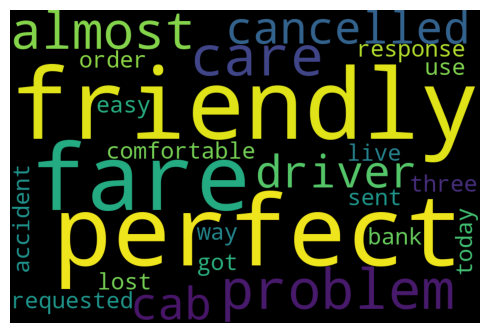

In [41]:
# topic 0
draw_word_cloud(0)

**LDA (LatentDirichletAllocation) with GenSim**

In [50]:
from gensim.utils import simple_preprocess

texts = reviews.clean_custom_comment.apply(simple_preprocess)

In [51]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [52]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [58]:
n_topics = 10

# Build an LSI(=Latent Semantic Indexing = LSA) model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [59]:
lsi_model.print_topics()

[(0,
  '-0.628*"advertising" + -0.587*"other" + -0.510*"service" + -0.018*"great" + -0.014*"rude" + -0.012*"bad" + -0.010*"driver" + -0.010*"very" + -0.008*"good" + -0.007*"utaxi"'),
 (1,
  '-0.641*"rude" + -0.406*"very" + -0.294*"driver" + -0.187*"bad" + -0.167*"good" + -0.166*"nice" + -0.141*"the" + -0.133*"not" + -0.121*"car" + -0.090*"trip"'),
 (2,
  '0.727*"rude" + -0.248*"good" + -0.234*"nice" + -0.182*"very" + -0.176*"great" + -0.147*"car" + -0.145*"bad" + -0.140*"not" + -0.120*"best" + -0.119*"trip"'),
 (3,
  '0.449*"very" + 0.294*"nice" + 0.278*"bad" + -0.263*"wrong" + 0.214*"good" + -0.175*"not" + -0.172*"address" + -0.171*"location" + -0.158*"best" + -0.151*"utaxi"'),
 (4,
  '0.525*"great" + -0.474*"bad" + 0.414*"best" + -0.197*"very" + -0.184*"wrong" + 0.176*"nice" + 0.148*"good" + -0.125*"behavior" + 0.125*"the" + -0.116*"address"'),
 (5,
  '-0.763*"best" + 0.500*"great" + -0.238*"the" + -0.187*"bad" + 0.111*"wrong" + 0.072*"good" + 0.068*"thanks" + 0.062*"address" + 0.061

In [60]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,-0.000010,freezing,0
1,-0.000010,apply,0
2,-0.000011,downstairs,0
3,-0.000012,screenshot,0
4,-0.000013,radio,0


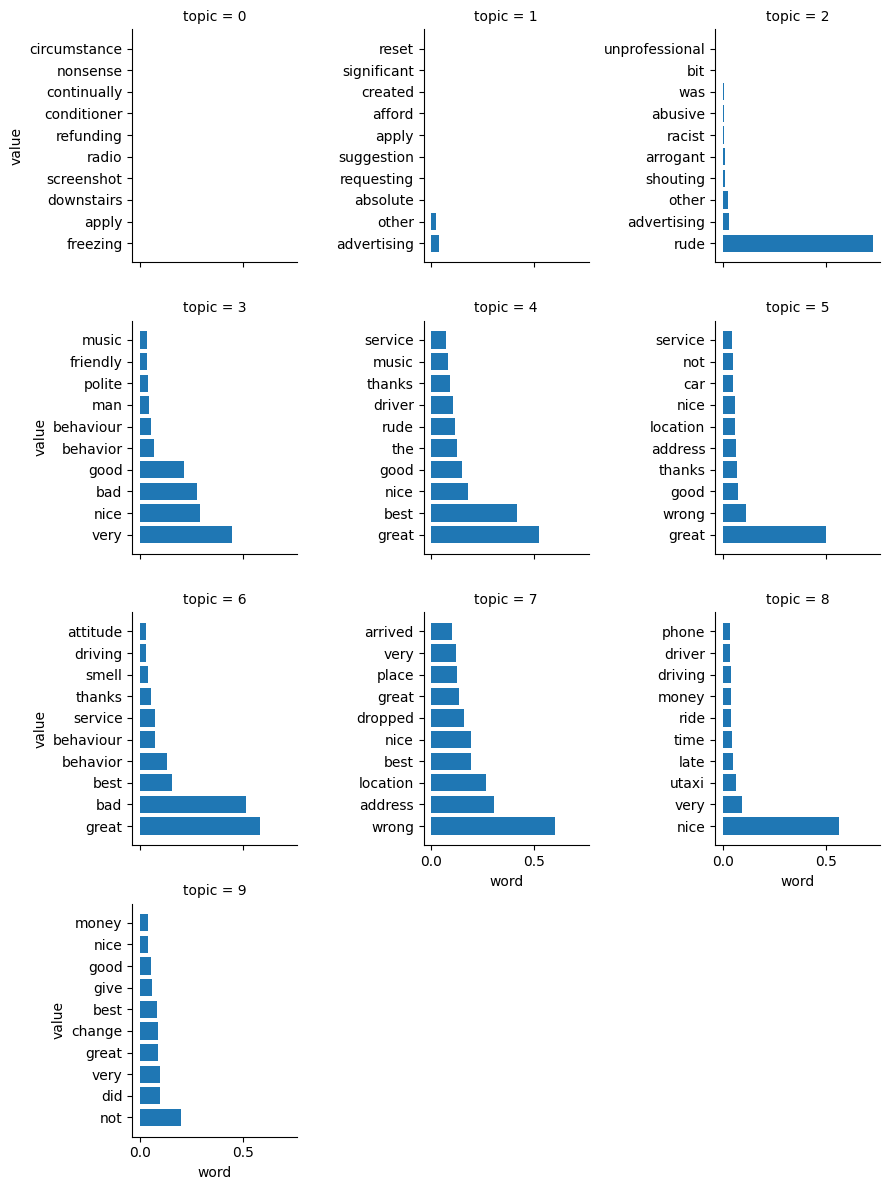

In [61]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [64]:
n_topics = 10

# Train the model on the corpus.
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=n_topics)

In [65]:
lda_model.print_topics()

[(0,
  '0.016*"utaxi" + 0.016*"charge" + 0.013*"ride" + 0.012*"received" + 0.012*"home" + 0.011*"same" + 0.011*"now" + 0.011*"anything" + 0.010*"then" + 0.010*"driver"'),
 (1,
  '0.026*"rude" + 0.019*"utaxi" + 0.017*"account" + 0.015*"driver" + 0.014*"last" + 0.012*"customer" + 0.012*"mile" + 0.011*"better" + 0.010*"over" + 0.010*"used"'),
 (2,
  '0.027*"utaxi" + 0.018*"fare" + 0.017*"service" + 0.014*"card" + 0.014*"always" + 0.012*"issue" + 0.011*"pickup" + 0.011*"location" + 0.011*"company" + 0.011*"refund"'),
 (3,
  '0.022*"bad" + 0.015*"very" + 0.014*"courteous" + 0.013*"behavior" + 0.012*"easy" + 0.010*"requested" + 0.010*"then" + 0.010*"more" + 0.010*"background" + 0.009*"picked"'),
 (4,
  '0.022*"cab" + 0.016*"nice" + 0.014*"address" + 0.013*"town" + 0.013*"driver" + 0.013*"perfect" + 0.013*"around" + 0.012*"contact" + 0.012*"used" + 0.012*"wrong"'),
 (5,
  '0.020*"best" + 0.018*"late" + 0.015*"scam" + 0.014*"helpful" + 0.013*"used" + 0.013*"fact" + 0.011*"driver" + 0.010*"came

In [66]:
n_words = 10
topic_words = pd.DataFrame({})

for i, topic in enumerate(lda_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.016327,utaxi,0
1,0.016267,charge,0
2,0.012957,ride,0
3,0.012208,received,0
4,0.011931,home,0


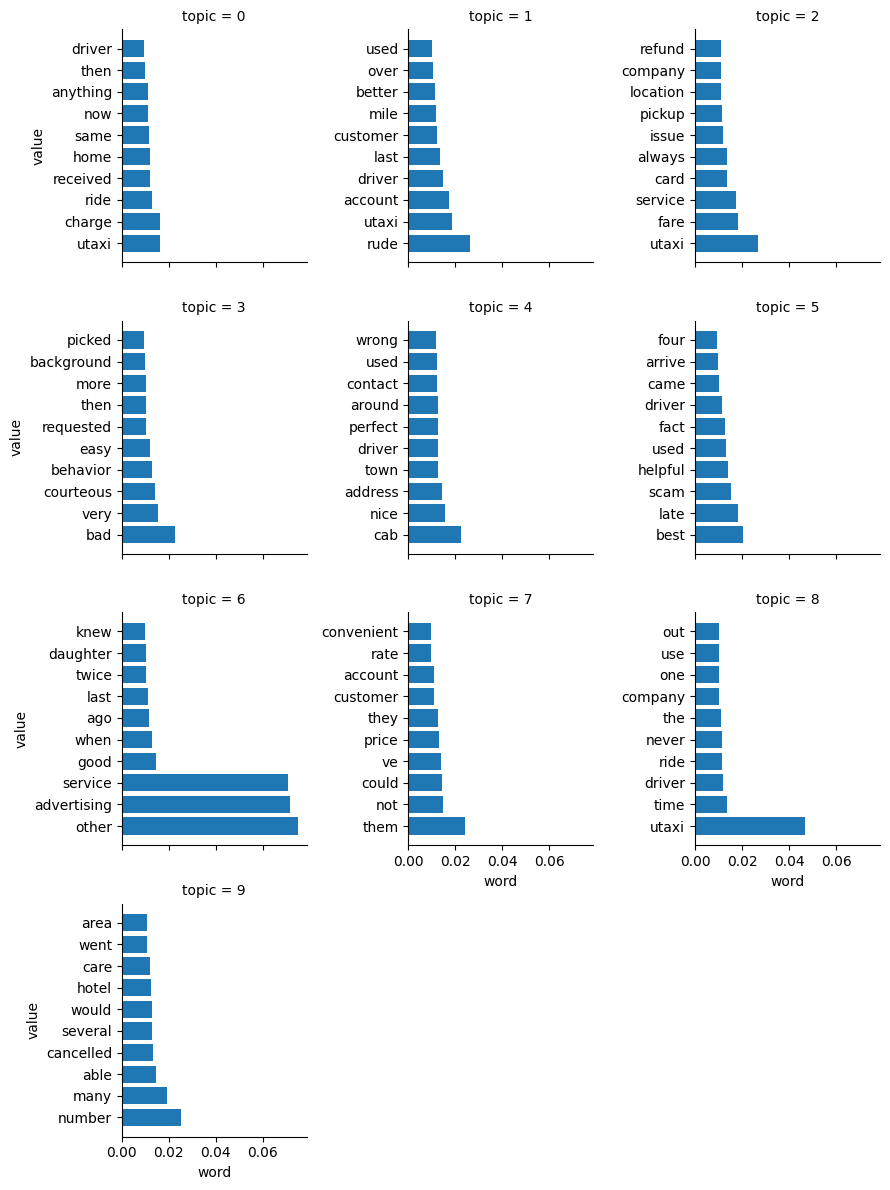

In [67]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

**BERTopic**

*BERTopic is a powerful tool for tasks such as document clustering, topic extraction based on the BERT (Bidirectional Encoder Representations from Transformers) algorithm.*

In [ ]:
!pip install bertopic

In [28]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans

In [14]:
corpus = reviews["clean_custom_comment"].to_list()

In [19]:
try:
  topic_model = BERTopic()
  topics, probs = topic_model.fit_transform(corpus)
except Exception as e:
  print(e)

BERTopic.__init__() got an unexpected keyword argument 'n_topics'


In [29]:
# umap_model = UMAP(n_neighbors=15, n_components=10, min_dist=0.0, metric='cosine')

cluster_model = KMeans(n_clusters=15)

topic_model = BERTopic(hdbscan_model=cluster_model)
topics, probs = topic_model.fit_transform(corpus)

In [30]:
# To see how many topics were extracted, and how many tokens are associated to each of these topics

topic_model.get_topic_info()

# [Topic] -1 refers to all outliers and should typically be ignored"

,Topic,Count,Name,Representation,Representative_Docs
0,0,793,0_driver_address_taxi_didn,"[driver, address, taxi, didn, late, wrong, not...",[The driver did not arrive did not pick pickup...
1,1,722,1_driver_nice_very_good,"[driver, nice, very, good, great, car, trip, b...","[Very nice car good driver Thank, good 😍😍😍😍😍th..."
2,2,719,2_driver_rude_driving_very,"[driver, rude, driving, very, bad, the, fast, ...","[The driver rude, Driver very rude, The driver..."
3,3,702,3_utaxi_not_nt_time,"[utaxi, not, nt, time, ride, driver, customer,...",[asked picked Utaxi 2/13/18 really cold out da...
4,4,538,4_wrong_location_address_drop,"[wrong, location, address, drop, place, droppe...","[Drop wrong location, Wrong location, arrived ..."
5,5,498,5_money_change_uah_give,"[money, change, uah, give, more, extra, driver...","[Very rude driver didn want give money back, d..."
6,6,491,6_rude_bad_very_behavior,"[rude, bad, very, behavior, behaviour, racist,...","[very rude, very rude, very rude]"
7,7,372,7_advertising_other_service_serviceshe,"[advertising, other, service, serviceshe, serv...","[Advertising other service, Advertising other ..."
8,8,346,8_very_nice_guy_great,"[very, nice, guy, great, good, man, service, f...","[Very good nice person, Very good nice, very n..."
9,9,307,9_phone_mask_driving_while,"[phone, mask, driving, while, driver, car, sea...","[Using phone while driving, phone use while dr..."


In [31]:
def showTopics():
  for topics in range(0, (len(topic_model.get_topic_info()))):
    print(f"\nTopic: {topics + 1}\n")
    for t in topic_model.get_topic(topics):
      print("\t", t[0])

showTopics()


Topic: 1

	 driver
	 address
	 taxi
	 didn
	 late
	 wrong
	 not
	 did
	 the
	 trip

Topic: 2

	 driver
	 nice
	 very
	 good
	 great
	 car
	 trip
	 best
	 polite
	 the

Topic: 3

	 driver
	 rude
	 driving
	 very
	 bad
	 the
	 fast
	 racist
	 drive
	 too

Topic: 4

	 utaxi
	 not
	 nt
	 time
	 ride
	 driver
	 customer
	 account
	 app
	 them

Topic: 5

	 wrong
	 location
	 address
	 drop
	 place
	 dropped
	 arrived
	 late
	 didn
	 destination

Topic: 6

	 money
	 change
	 uah
	 give
	 more
	 extra
	 driver
	 took
	 didn
	 pay

Topic: 7

	 rude
	 bad
	 very
	 behavior
	 behaviour
	 racist
	 shouting
	 too
	 attitude
	 was

Topic: 8

	 advertising
	 other
	 service
	 serviceshe
	 servicesvery
	 servicesbad
	 servicesdidn
	 serviceswas
	 servicesso
	 servicesnot

Topic: 9

	 very
	 nice
	 guy
	 great
	 good
	 man
	 service
	 friendly
	 really
	 recommend

Topic: 10

	 phone
	 mask
	 driving
	 while
	 driver
	 car
	 seat
	 texting
	 belt
	 talking

Topic: 11

	 music
	 english
	 good
	 russia

In [32]:
topic_model.visualize_barchart()